Import Data

In [28]:

# Load applications data
apps_df = pd.read_csv('df_apps_by_state_output.csv')
apps_df['date'] = pd.to_datetime(apps_df['month'])
# print(f"✅ Applications: {len(apps_df):,} records")

# Load unemployment data
unemp_df = pd.read_csv('bls_state_unemployment.csv')
unemp_df['month_num'] = unemp_df['period'].str.replace('M', '').astype(int)
unemp_df['date'] = pd.to_datetime(unemp_df[['year', 'month_num']].rename(columns={'month_num': 'month'}).assign(day=1))
unemp_df['unemployment_rate'] = unemp_df['value']
unemp_df['state_name'] = unemp_df['state']

# Lood 
min_wage_df = pd.read_csv('min_wage_by_state/dol_monthly_minimum_wage_by_state.csv')
min_wage_df['date'] = pd.to_datetime(min_wage_df['date'])

# Load CPI data
cpi_df = pd.read_csv('min_wage_by_state/monthly_cpi_by_state.csv')
cpi_df['date'] = pd.to_datetime(cpi_df['date'])




In [29]:
merged = apps_df[['state_name', 'date', 'apps_18plus']].copy()
merged = merged.merge(
    unemp_df[['state_name', 'date', 'unemployment_rate']], 
    on=['state_name', 'date'], 
    how='inner'
)

merged = merged.merge(
    min_wage_df[['state_name', 'date', 'minimum_wage']], 
    on=['state_name', 'date'], 
    how='inner'
)

merged = merged.merge(
    cpi_df[['state_name', 'date', 'cpi_value']], 
    on=['state_name', 'date'], 
    how='inner'
)

In [ ]:
merged_sorted = merged.sort_values(['state_name', 'date']).copy().reset_index(drop=True)

# merged_sorted['unemployment_pct_change'] = merged_sorted.groupby('state_name')['unemployment_rate'].pct_change() * 100
# merged_sorted['apps_pct_change'] = merged_sorted.groupby('state_name')['apps_18plus'].pct_change() * 100
# merged_sorted['cpi_value_pct_change'] = merged_sorted.groupby('state_name')['cpi_value'].pct_change() * 100

# changes_data = merged_sorted.dropna(subset=['unemployment_pct_change', 'apps_pct_change','cpi_value_pct_change'])
# # changes_data = changes_data[
# #     (abs(changes_data['unemployment_pct_change']) < 50) & 
# #     (abs(changes_data['apps_pct_change']) < 200)
# # ]
# changes_data

,state_name,date,apps_18plus,unemployment_rate,minimum_wage,cpi_value,unemployment_pct_change,apps_pct_change,cpi_value_pct_change
1,Alabama,2023-02-01,5763,2.5,7.25,301.628755,-3.846154,-33.460339,0.703853
2,Alabama,2023-03-01,7021,2.2,7.25,301.807066,-12.000000,21.828909,0.059116
3,Alabama,2023-04-01,7302,1.8,7.25,304.126117,-18.181818,4.002279,0.768388
4,Alabama,2023-05-01,7878,2.0,7.25,304.180430,11.111111,7.888250,0.017859
5,Alabama,2023-06-01,8335,2.7,7.25,305.928487,35.000000,5.800965,0.574678
...,...,...,...,...,...,...,...,...,...
1545,Wyoming,2025-03-01,857,3.7,5.15,318.722868,0.000000,23.487032,-0.053593
1546,Wyoming,2025-04-01,742,3.0,5.15,320.030950,-18.918919,-13.418903,0.410414
1547,Wyoming,2025-05-01,691,3.2,5.15,322.128535,6.666667,-6.873315,0.655432
1548,Wyoming,2025-06-01,699,3.7,5.15,323.106872,15.625000,1.157742,0.303710


In [ ]:
merged_sorted.to_csv('merged_sorted.csv', index=False)

In [36]:
changes_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, 1 to 1549
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   state_name               1500 non-null   object        
 1   date                     1500 non-null   datetime64[ns]
 2   apps_18plus              1500 non-null   int64         
 3   unemployment_rate        1500 non-null   float64       
 4   minimum_wage             1500 non-null   float64       
 5   cpi_value                1500 non-null   float64       
 6   unemployment_pct_change  1500 non-null   float64       
 7   apps_pct_change          1500 non-null   float64       
 8   cpi_value_pct_change     1500 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 117.2+ KB



=== MAIN MODEL (unemployment ~ applicants | state FE + year-month FE; CPI level) ===
unemployment_pct_change ~ apps_pct_change + minimum_wage + cpi_value + C(state_name) + C(year_month)
                               OLS Regression Results                              
Dep. Variable:     unemployment_pct_change   R-squared:                       0.584
Model:                                 OLS   Adj. R-squared:                  0.560
Method:                      Least Squares   F-statistic:                     165.6
Date:                     Mon, 08 Sep 2025   Prob (F-statistic):           3.26e-40
Time:                             13:15:35   Log-Likelihood:                -5078.7
No. Observations:                     1500   AIC:                         1.032e+04
Df Residuals:                         1418   BIC:                         1.076e+04
Df Model:                               81                                         
Covariance Type:                   cluster               

/Users/tl759k/Documents/GitHub/work/cursor-analytics/venv/lib/python3.11/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 81, but rank is 32
  warnings.warn('covariance of constraints does not have full '
/Users/tl759k/Documents/GitHub/work/cursor-analytics/venv/lib/python3.11/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 81, but rank is 32
  warnings.warn('covariance of constraints does not have full '
/Users/tl759k/Documents/GitHub/work/cursor-analytics/venv/lib/python3.11/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 54, but rank is 5
  warnings.warn('covariance of constraints does not have full '


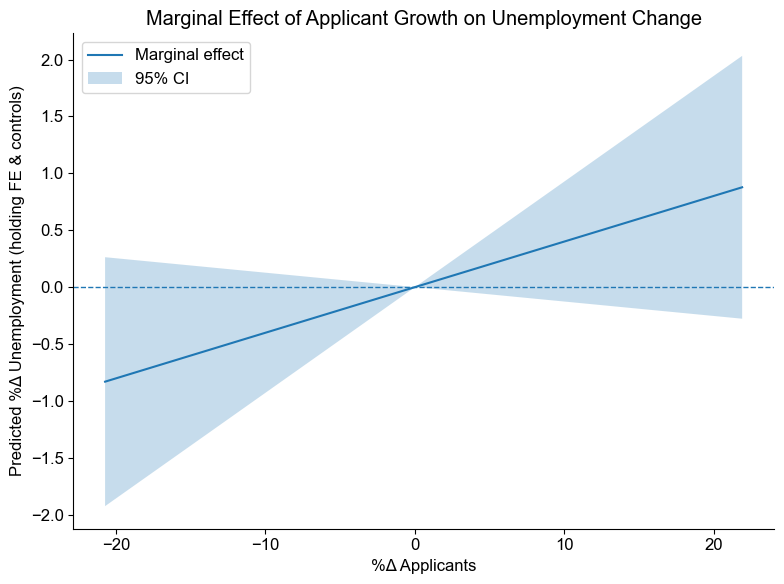


=== Key Coefficients Comparison ===
                                         coef   std_err         t     p>|t|  \
MAIN: dU ~ dApps (YM FE; CPI lvl)    0.040090  0.026926  1.488907  0.136512   
ALT CPI: dU ~ dApps (YM FE; CPI %Δ)  0.040252  0.026739  1.505385  0.132225   
FLIP: dApps ~ dU (Year FE; CPI lvl)  0.138519  0.034248  4.044539  0.000052   

                                       ci_low   ci_high  
MAIN: dU ~ dApps (YM FE; CPI lvl)   -0.012684  0.092865  
ALT CPI: dU ~ dApps (YM FE; CPI %Δ) -0.012155  0.092659  
FLIP: dApps ~ dU (Year FE; CPI lvl)  0.071393  0.205644  


In [38]:
# --- Setup ---
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# -------------------------------------------------------------------
# Assumptions:
# - Your DataFrame is called `changes_data` and has the columns shown.
# - If you have population, include it as either a level ("population")
#   and/or a percent change ("population_pct_change"). If it's not available,
#   the code will gracefully drop it as a control.
# -------------------------------------------------------------------

# 1) Basic cleaning & feature engineering
df = changes_data.copy()

# Ensure correct dtypes
df['date'] = pd.to_datetime(df['date'])
df['state_name'] = df['state_name'].astype('category')

# Seasonality / time FE
df['month'] = df['date'].dt.month.astype('category')                 # month-of-year FE (original)
df['year'] = df['date'].dt.year.astype('category')                   # year FE
df['year_month'] = df['date'].dt.to_period('M').astype(str).astype('category')  # year–month FE

# 2) Choose dependent and key regressor (original direction)
dep_var = 'unemployment_pct_change'
key_x  = 'apps_pct_change'

# 3) Build control list dynamically (only include if present)
possible_controls = [
    'minimum_wage',           # level
    'cpi_value',              # CPI level
    'cpi_value_pct_change',   # CPI %Δ
    'population',             # level (if present)
    'population_pct_change'   # %Δ population (if present)
]
# helper to include only columns that exist
def present(cols, frame):
    return [c for c in cols if c in frame.columns]

# ------------------------
# Helper to build a model
# ------------------------
def run_model(frame, y, x, time_fe='month', use_cpi='level', extra_controls=None):
    """
    time_fe: 'month' | 'year' | 'year_month'
    use_cpi: 'level' | 'pct' | 'none'   (choose one to reduce multicollinearity)
    extra_controls: list of additional control names to try to include if present
    """
    if extra_controls is None:
        extra_controls = []

    # pick CPI variant
    cpi_cols = []
    if use_cpi == 'level':
        cpi_cols = present(['cpi_value'], frame)
    elif use_cpi == 'pct':
        cpi_cols = present(['cpi_value_pct_change'], frame)
    elif use_cpi == 'none':
        cpi_cols = []

    base_controls = present(['minimum_wage', 'population', 'population_pct_change'], frame)
    controls = base_controls + cpi_cols + present(extra_controls, frame)

    # choose time FE
    time_fe_col = {'month': 'C(month)', 'year': 'C(year)', 'year_month': 'C(year_month)'}[time_fe]

    # drop missing
    needed = [y, x, 'state_name'] + controls
    # include time FE columns required
    if time_fe == 'month':
        needed += ['month']
    elif time_fe == 'year':
        needed += ['year']
    elif time_fe == 'year_month':
        needed += ['year_month']

    df_reg = frame.dropna(subset=needed).copy()

    # build formula
    rhs_parts = [x] + controls + ['C(state_name)', time_fe_col]
    formula = f"{y} ~ {' + '.join(rhs_parts)}"

    model = smf.ols(formula, data=df_reg).fit(
        cov_type='cluster',
        cov_kwds={'groups': df_reg['state_name']}
    )
    return model, df_reg, formula

# ------------------------
# (A) Revised MAIN model
#     Unemployment %Δ ~ Applicants %Δ
#     1) Reduce multicollinearity: keep CPI level, drop CPI %Δ
#     2) Stronger time FE: year–month FE
# ------------------------
model_main, df_main, formula_main = run_model(
    df, y='unemployment_pct_change', x='apps_pct_change',
    time_fe='year_month', use_cpi='level'
)
print("\n=== MAIN MODEL (unemployment ~ applicants | state FE + year-month FE; CPI level) ===")
print(formula_main)
print(model_main.summary())

# ------------------------
# (B) Alt CPI specification (robustness):
#     Keep CPI %Δ instead of level (to diagnose multicollinearity concerns)
# ------------------------
model_cpi_pct, df_cpi_pct, formula_cpi_pct = run_model(
    df, y='unemployment_pct_change', x='apps_pct_change',
    time_fe='year_month', use_cpi='pct'
)
print("\n=== ALT MODEL (unemployment ~ applicants | state FE + year-month FE; CPI %Δ) ===")
print(formula_cpi_pct)
print(model_cpi_pct.summary())

# ------------------------
# (C) Flipped regression:
#     Applicants %Δ ~ Unemployment %Δ
#     Use state FE + YEAR FE (less saturated than year–month for a different look)
# ------------------------
model_flip, df_flip, formula_flip = run_model(
    df, y='apps_pct_change', x='unemployment_pct_change',
    time_fe='year', use_cpi='level'
)
print("\n=== FLIPPED MODEL (applicants ~ unemployment | state FE + year FE; CPI level) ===")
print(formula_flip)
print(model_flip.summary())

# ------------------------
# (D) Marginal effect plot for MAIN model:
#     Marginal effect of applicants %Δ on unemployment %Δ with 95% CI
#     For a linear model, the marginal effect equals the slope (beta_x).
#     The CI band around the linear effect line is (beta_x ± 1.96*se_x)*x.
# ------------------------
coef = model_main.params.get('apps_pct_change', np.nan)
se   = model_main.bse.get('apps_pct_change', np.nan)

# Range for x-axis based on observed distribution
xgrid = np.linspace(df_main['apps_pct_change'].quantile(0.05),
                    df_main['apps_pct_change'].quantile(0.95), 200)

yhat_line = coef * xgrid
yhat_lo   = (coef - 1.96 * se) * xgrid
yhat_hi   = (coef + 1.96 * se) * xgrid

plt.figure(figsize=(8, 6))
plt.plot(xgrid, yhat_line, label="Marginal effect")
plt.fill_between(xgrid, yhat_lo, yhat_hi, alpha=0.25, label="95% CI")
plt.axhline(0, linestyle="--", linewidth=1)
plt.xlabel("%Δ Applicants")
plt.ylabel("Predicted %Δ Unemployment (holding FE & controls)")
plt.title("Marginal Effect of Applicant Growth on Unemployment Change")
plt.legend()
plt.tight_layout()
plt.show()

# ------------------------
# (E) Nicely formatted coefficient rows for quick comparison
# ------------------------
def coef_row(mod, var):
    return pd.Series({
        'coef': mod.params.get(var, np.nan),
        'std_err': mod.bse.get(var, np.nan),
        't': mod.tvalues.get(var, np.nan),
        'p>|t|': mod.pvalues.get(var, np.nan),
        'ci_low': mod.conf_int().loc[var, 0] if var in mod.params.index else np.nan,
        'ci_high': mod.conf_int().loc[var, 1] if var in mod.params.index else np.nan,
    })

summary_table = pd.DataFrame({
    'MAIN: dU ~ dApps (YM FE; CPI lvl)': coef_row(model_main, 'apps_pct_change'),
    'ALT CPI: dU ~ dApps (YM FE; CPI %Δ)': coef_row(model_cpi_pct, 'apps_pct_change'),
    'FLIP: dApps ~ dU (Year FE; CPI lvl)': coef_row(model_flip, 'unemployment_pct_change'),
}).T

print("\n=== Key Coefficients Comparison ===")
print(summary_table)


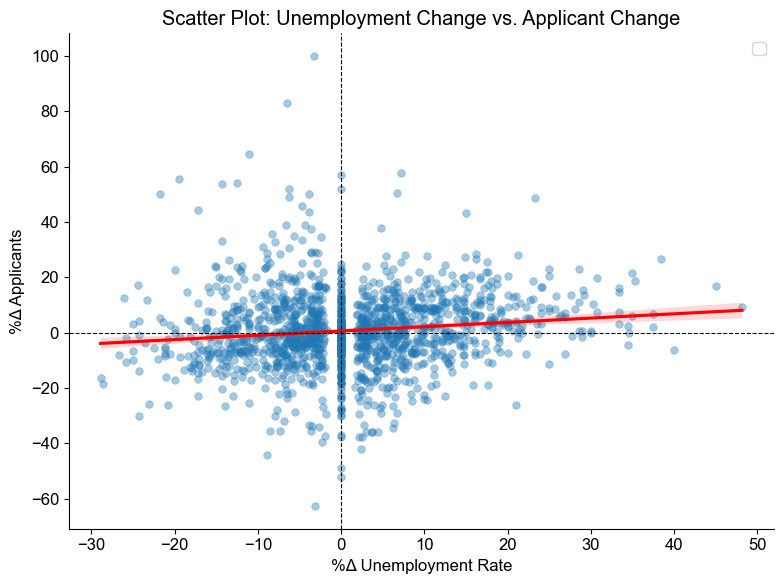

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure you have your cleaned DataFrame
df_plot = changes_data.copy()

plt.figure(figsize=(8,6))

# Scatter plot: each dot = state-month
sns.scatterplot(
    data=df_plot,
    x="unemployment_pct_change",
    y="apps_pct_change",
    alpha=0.4,
    s=30,
    edgecolor=None
)

# Add regression line (OLS trend line with 95% CI)
sns.regplot(
    data=df_plot,
    x="unemployment_pct_change",
    y="apps_pct_change",
    scatter=False,
    ci=95,
    line_kws={"color": "red", "label": "OLS Trend"}
)

plt.axhline(0, color="black", linestyle="--", linewidth=0.8)
plt.axvline(0, color="black", linestyle="--", linewidth=0.8)
plt.xlabel("%Δ Unemployment Rate")
plt.ylabel("%Δ Applicants")
plt.title("Scatter Plot: Unemployment Change vs. Applicant Change")
plt.legend()
plt.tight_layout()
plt.show()
